# Lending Club Loan Default Prediction

### Pujan Malavia

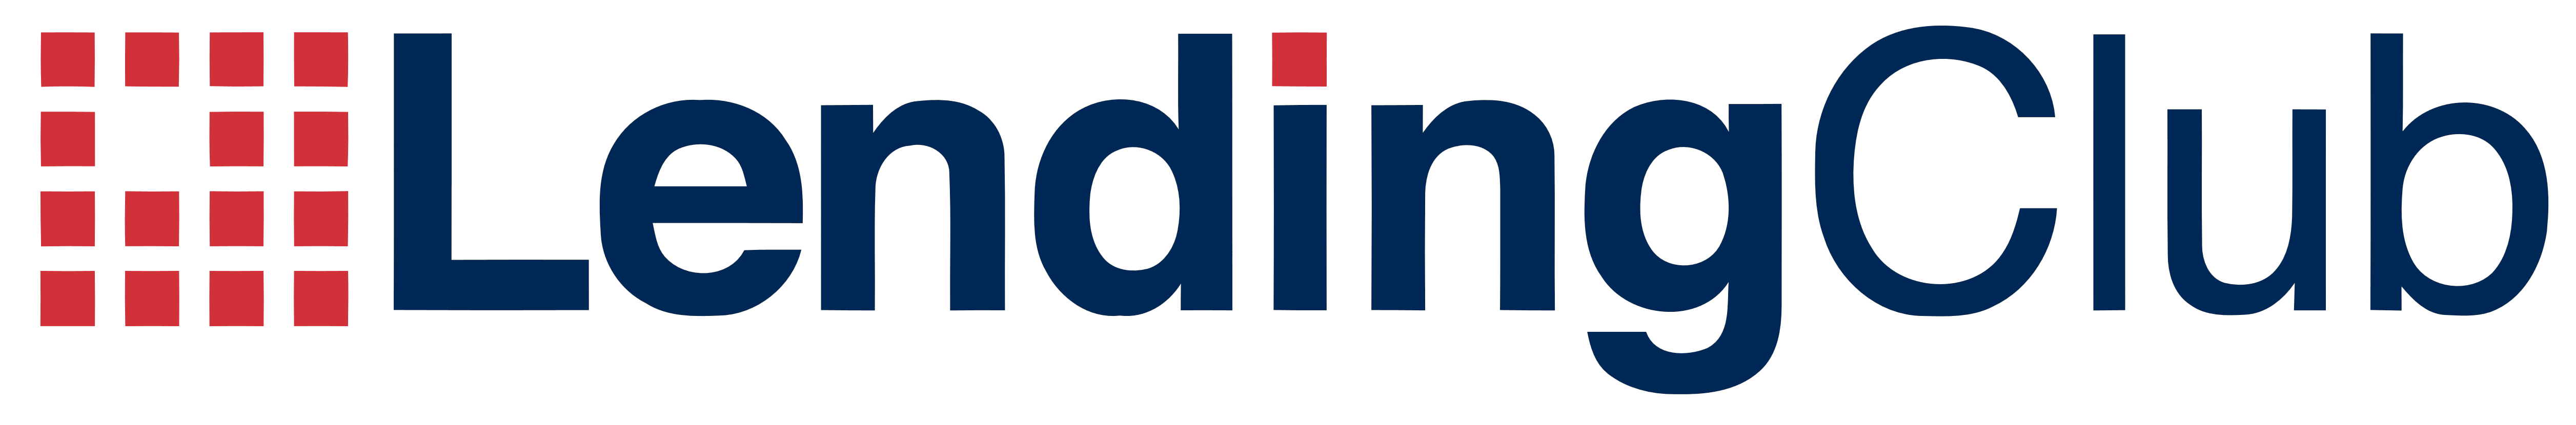

In [1]:
from IPython.display import display
from PIL import Image
path="C:/Users/puj83/OneDrive/Portfolio/Loan/Lending_Club_logo.png"
display(Image.open(path))

### Link to Dataset:

https://www.kaggle.com/loknath2017/lending-loan-data?select=accepted_2007_to_2017Q3.csv.gz

### Abstract:

Year after year, there are millions of people who default on their loans which causes high risk to the lending partner. Many wonder, what makes a customer default on a loan? Is it their income, debt to income ratio, or it something more behaviorial that causes this trend? In this project, we will explore potential indicator variables that play a large role in terms of customers defaulting on their loans. 

### Industry:
Financial Services/Internet

### Company Information:

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015.

LendingClub enables borrowers to create unsecured personal loans between 1,000 and 40,000. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

LendingClub also makes traditional direct to consumer loans, including automobile refinance transactions, through WebBank, an FDIC-insured, state-chartered industrial bank that is headquartered in Salt Lake City Utah. The loans are not funded by investors but are assigned to other financial institutions.

The company raised $1 billion in what became the largest technology IPO of 2014 in the United States. Though viewed as a pioneer in the fintech industry and one of the largest such firms, LendingClub experienced problems in early 2016, with difficulties in attracting investors, a scandal over some of the firm's loans and concerns by the board over CEO Renaud Laplanche's disclosures leading to a large drop in its share price and Laplanche's resignation.

https://www.lendingclub.com/

https://en.wikipedia.org/wiki/LendingClub

### Use Case:

Build a model to predict which factors drives loan defaults

### Initial Dataset:
Loan Dataset

### Tool:
Python (Jupyter Notebook)

In [2]:
!pip install treeinterpreter

In [3]:
# Import packages & libraries 
import os
import pandas as pd
from pandas import Series, DataFrame
#import pandas_profiling

pd.set_option('display.max_rows', None,'display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer, roc_auc_score,accuracy_score, roc_curve
from scipy.stats import ks_2samp
from treeinterpreter import treeinterpreter as ti

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')#from sklearn import cross_validation
from sklearn import metrics

"""
from sklearn import metrics
from sklearn import linear_model

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import preprocessing
"""

# ignore Deprecation Warning
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning,RuntimeWarning) 
warnings.filterwarnings("ignore") 

#plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

C:\Users\puj83\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv("C:/Users/puj83/OneDrive/Portfolio/Loan/accepted_2007_to_2017Q3.csv.gz",compression='gzip',low_memory=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Columns: 150 entries, id to settlement_term
dtypes: float64(113), object(37)
memory usage: 1.8+ GB


In [6]:
df.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1190010,119426724,NaN,11000.0,11000.0,11000.0,36 months,9.93,354.58,B,B2,Foreman,8 years,MORTGAGE,75000.0,Source Verified,Sep-2017,Current,n,NaN,credit_card,Credit card refinancing,066xx,CT,8.78,0.0,Jul-2002,675.0,679.0,0.0,NaN,NaN,7.0,0.0,5004.0,48.6,15.0,w,10470.71,10470.71,697.020000,697.02,529.29,167.73,0.0,0.0,0.0,Dec-2017,354.58,Jan-2018,Dec-2017,699.0,695.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3199.0,233652.0,0.0,1.0,0.0,0.0,42.0,9546.0,54.0,1.0,2.0,3959.0,53.0,10300.0,0.0,0.0,2.0,4.0,33379.0,3296.0,60.3,0.0,0.0,135.0,182.0,8.0,8.0,1.0,8.0,NaN,5.0,NaN,0.0,3.0,3.0,3.0,9.0,3.0,4.0,10.0,3.0,7.0,0.0,0.0,0.0,3.0,100.0,33.3,0.0,0.0,251831.0,14675.0,8300.0,17536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1067153,96850692,NaN,20000.0,20000.0,20000.0,60 months,28.69,631.07,F,F1,US Army Recruiter,6 years,RENT,85848.0,Source Verified,Jan-2017,Current,n,NaN,debt_consolidation,Debt consolidation,070xx,NJ,22.06,0.0,Mar-2010,670.0,674.0,0.0,NaN,NaN,10.0,0.0,10938.0,66.3,19.0,w,18297.73,18297.73,6246.940000,6246.94,1702.27,4544.67,0.0,0.0,0.0,Dec-2017,631.07,Jan-2018,Dec-2017,689.0,685.0,0.0,NaN,1.0,Joint App,102228.0,25.46,Not Verified,0.0,0.0,71145.0,1.0,4.0,1.0,5.0,7.0,60207.0,76.0,1.0,2.0,3503.0,72.0,16500.0,6.0,2.0,6.0,7.0,7115.0,0.0,100.1,0.0,0.0,82.0,35.0,3.0,3.0,0.0,30.0,NaN,8.0,NaN,1.0,1.0,6.0,1.0,1.0,13.0,6.0,6.0,6.0,10.0,0.0,0.0,0.0,2.0,94.7,100.0,0.0,0.0,84492.0,71145.0,3500.0,67992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Na

In [7]:
df['loan_status'].value_counts()

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
Name: loan_status, dtype: int64

In [8]:
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [9]:
df['loan_status'].value_counts(normalize=False, dropna=False)

Fully Paid     646902
Charged Off    168084
Name: loan_status, dtype: int64

In [10]:
df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.793758
Charged Off    0.206242
Name: loan_status, dtype: float64

In [11]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [12]:
missing_values_table(df)

Your selected dataframe has 150 columns.
There are 104 columns that have missing values.


,Missing Values,% of Total Values,type
member_id,814986,100.0,float64
next_pymnt_d,814986,100.0,object
orig_projected_additional_accrued_interest,814885,100.0,float64
sec_app_mths_since_last_major_derog,814683,100.0,float64
hardship_length,814395,99.9,float64
hardship_type,814395,99.9,object
hardship_reason,814395,99.9,object
hardship_status,814395,99.9,object
deferral_term,814395,99.9,float64
hardship_amount,814395,99.9,float64


In [13]:
missing_frac = df.isnull().mean()
drop_list = sorted(missing_frac[missing_frac > 0.50].index)

In [14]:
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [15]:
len(drop_list)

58

In [16]:
def drop_cols(cols):
    df.drop(labels=cols, axis=1, inplace=True)

In [17]:
drop_cols(drop_list)

In [18]:
df.shape

(814986, 92)

In [19]:
print(sorted(df.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sa

In [20]:
drop_list = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
             'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
             'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 
             'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'last_fico_range_high', 
             'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
             'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
             'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
             'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
             'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 
             'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 
             'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
             'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim']

In [21]:
drop_cols(drop_list)

In [22]:
print(sorted(df.columns))

['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc', 'open_acc', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']


In [23]:
len(df.columns)

34

In [24]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='loan_status', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

In [25]:
df['id'].sample(5)

1133584    87953895
601070     45424504
587193     46843573
207968     12275087
191919     12957070
Name: id, dtype: object

In [26]:
len(df['id'].unique())

814986

In [27]:
drop_cols('id')

In [28]:
df['loan_amnt'].describe()

count    814986.000000
mean      14315.458210
std        8499.799241
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

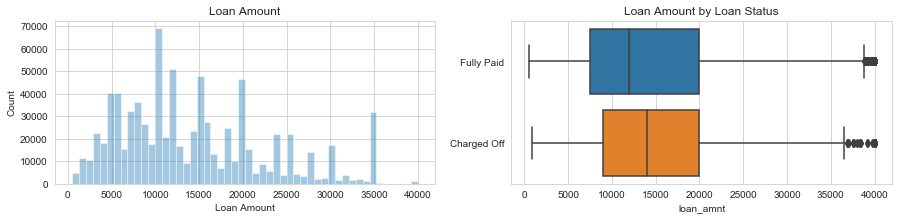

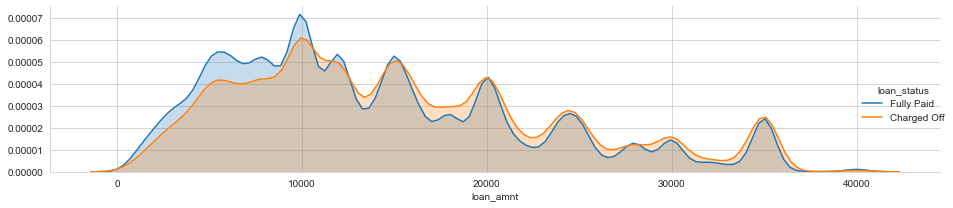

In [29]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [30]:
df['term'].sample(5)

262344      60 months
191707      36 months
26673       36 months
63522       36 months
1601321     36 months
Name: term, dtype: object

In [31]:
df['term'].value_counts(dropna=False)

 36 months    618460
 60 months    196526
Name: term, dtype: int64

In [32]:
df['term'] = df['term'].apply(lambda s: np.int8(s.split()[0]))

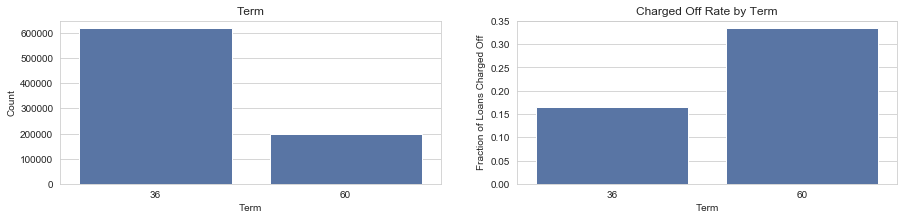

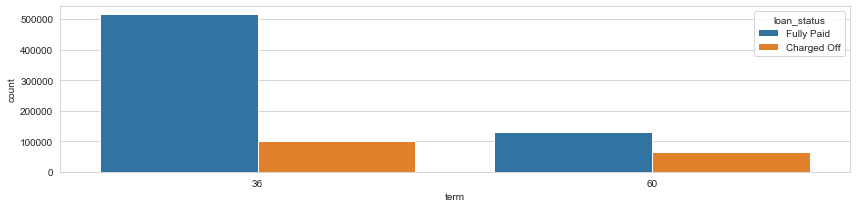

In [33]:
plot_var('term', 'Term', continuous=False)

In [34]:
df['term'].value_counts(normalize=True)

36    0.75886
60    0.24114
Name: term, dtype: float64

In [35]:
df.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.165710
60    0.333793
Name: loan_status, dtype: float64

In [36]:
df['int_rate'].describe()

count    814986.000000
mean         13.490993
std           4.618486
min           5.320000
25%           9.990000
50%          13.110000
75%          16.290000
max          30.990000
Name: int_rate, dtype: float64

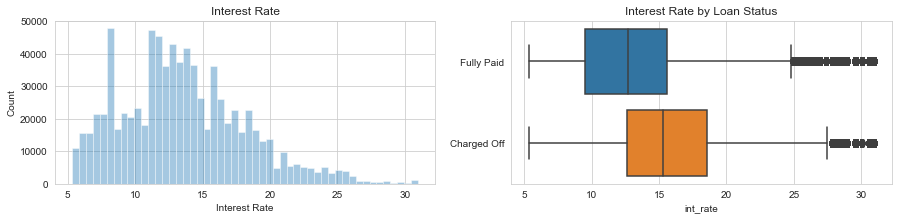

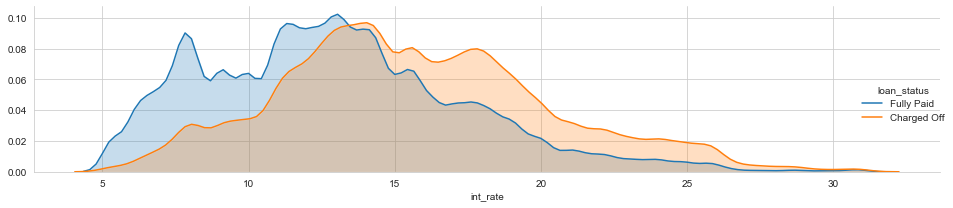

In [37]:
plot_var('int_rate', 'Interest Rate', continuous=True)

In [38]:
def outliers_modified_z_score(dataframe, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices corresponding to the observations containing more than n outliers according to the modified z-score Method
    """
    threshold = 3.5
    outlier_indices = []
    for col in features:
        median_y = np.median(dataframe[col])
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in dataframe[col]])
        modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in dataframe[col]]
        outlier_list_col = dataframe[np.abs(modified_z_scores) > threshold].index
       # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

#Outliers_to_drop_z_score = outliers_modified_z_score(df,2,['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti','fico_range_high', 'pub_rec', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mort_acc','earliest_cr_line_'])

In [39]:
def outliers_iqr(dataframe, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    for col in features:
        # 1st quartile (25%) & # 3rd quartile (75%)
        quartile_1, quartile_3 = np.percentile(dataframe[col], [25,75])
        #quartile_3 = np.percentile(dataframe[col], 75)
      
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)].index
       # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers

In [40]:
df.groupby('loan_status')['int_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,15.736335,4.625755,5.32,12.59,15.31,18.55,30.99
Fully Paid,646902.0,12.907587,4.434262,5.32,9.49,12.68,15.61,30.99


In [41]:
df.loc[(df.int_rate > 15.61) & (df.loan_status == 'Fully Paid')].shape[0]


150885

In [42]:
(df.loc[(df.int_rate > 15.61) & (df.loan_status == 'Fully Paid')].shape[0])/df['loan_status'].value_counts(normalize=False, dropna=False)[0]

0.2332424385764768

In [43]:
df.loc[(df.int_rate >18.55) & (df.loan_status == 'Charged Off')].shape[0]/df['loan_status'].value_counts(normalize=False, dropna=False)[1]

0.24427072178196615

In [44]:
df['installment'].describe()


count    814986.000000
mean        436.749624
std         255.732093
min           4.930000
25%         251.400000
50%         377.040000
75%         576.290000
max        1714.540000
Name: installment, dtype: float64

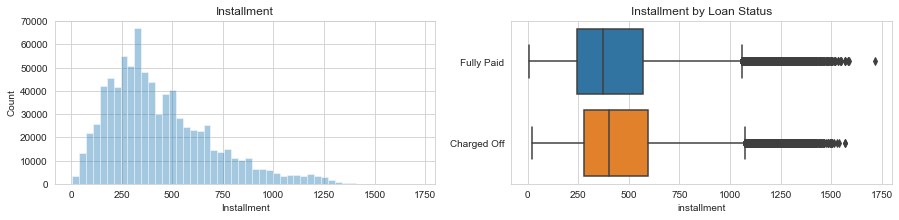

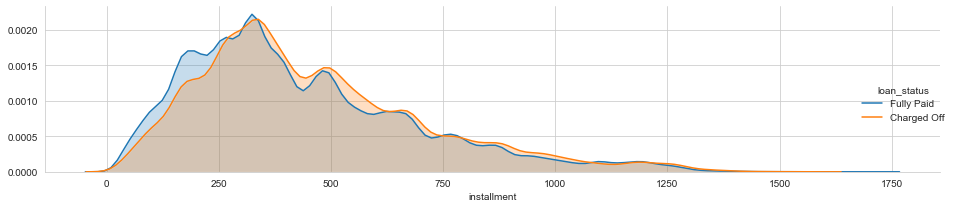

In [45]:
plot_var('installment', 'Installment', continuous=True)


In [46]:
df.groupby('loan_status')['installment'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,459.973673,255.309267,21.62,276.14,402.39,595.87,1569.11
Fully Paid,646902.0,430.715339,255.496761,4.93,244.76,370.92,569.72,1714.54


In [47]:
sorted(df['grade'].unique())


['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [48]:
print(sorted(df['sub_grade'].unique()))


['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


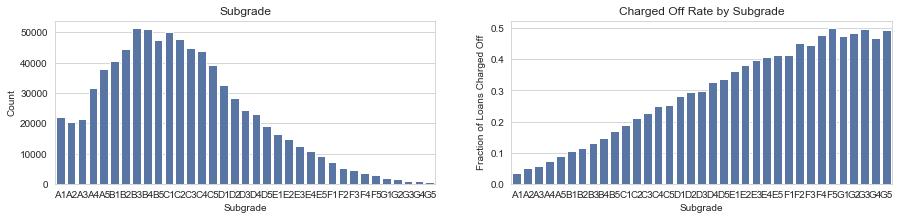

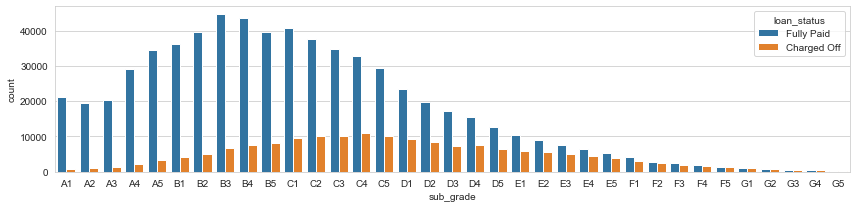

In [49]:
plot_var('sub_grade','Subgrade',continuous=False)


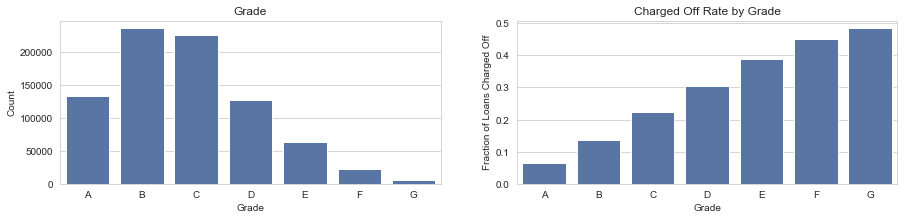

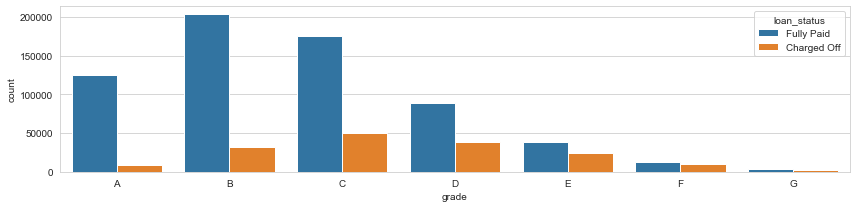

In [50]:
plot_var('grade','Grade',continuous=False)


In [51]:
#df.drop(labels='grade',axis=1,inplace=True)
drop_cols('grade')

In [52]:
df['emp_title'].describe()

count      766415
unique     280473
top       Teacher
freq        11351
Name: emp_title, dtype: object

In [53]:
df['emp_title'].sample(5)


693773         Executive Assistant
847658            Store Supervisor
222396                     Auditor
899590    Acme Construction Supply
836919                 Optometrist
Name: emp_title, dtype: object

In [54]:
drop_cols('emp_title')

In [55]:
df['emp_length'].value_counts(dropna=False).sort_index()

1 year        53411
10+ years    264873
2 years       73493
3 years       64999
4 years       48752
5 years       52149
6 years       40290
7 years       39407
8 years       38887
9 years       31900
< 1 year      64572
NaN           42253
Name: emp_length, dtype: int64

In [56]:
df['emp_length'].replace('10+ years', '10 years', inplace=True)

In [57]:
df['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [58]:
df['emp_length'].value_counts(dropna=False).sort_index()

0 years      64572
1 year       53411
10 years    264873
2 years      73493
3 years      64999
4 years      48752
5 years      52149
6 years      40290
7 years      39407
8 years      38887
9 years      31900
NaN          42253
Name: emp_length, dtype: int64

In [59]:
df.emp_length.map( lambda x: str(x).split()[0]).value_counts(dropna=True).sort_index()

0       64572
1       53411
10     264873
2       73493
3       64999
4       48752
5       52149
6       40290
7       39407
8       38887
9       31900
nan     42253
Name: emp_length, dtype: int64

In [60]:
df['emp_length'] = df.emp_length.map( lambda x: float(str(x).split()[0]))

In [61]:
df['emp_length'].sample(5)

216040      1.0
282067      2.0
887187      2.0
1099976    10.0
467054     10.0
Name: emp_length, dtype: float64

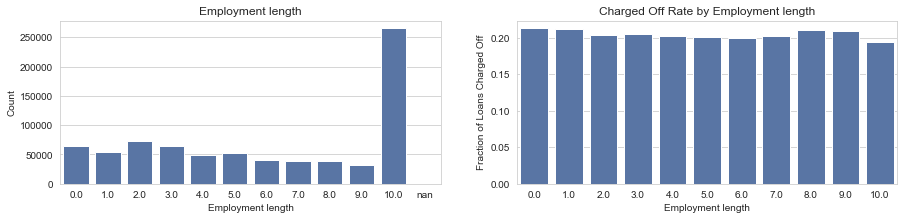

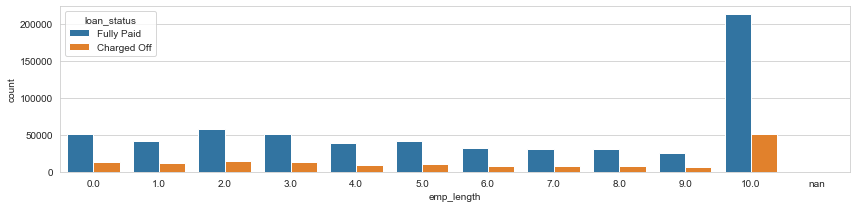

In [62]:
plot_var('emp_length', 'Employment length', continuous=False)

In [63]:
df['home_ownership'].value_counts()

MORTGAGE    406866
RENT        325071
OWN          82765
OTHER          144
ANY             94
NONE            46
Name: home_ownership, dtype: int64

In [64]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER', inplace=True)

In [65]:
df['home_ownership'].value_counts()

MORTGAGE    406866
RENT        325071
OWN          82765
OTHER          284
Name: home_ownership, dtype: int64

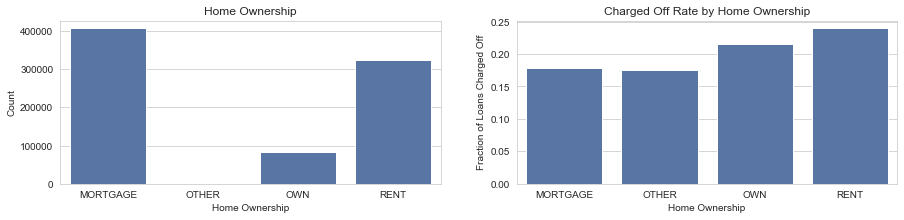

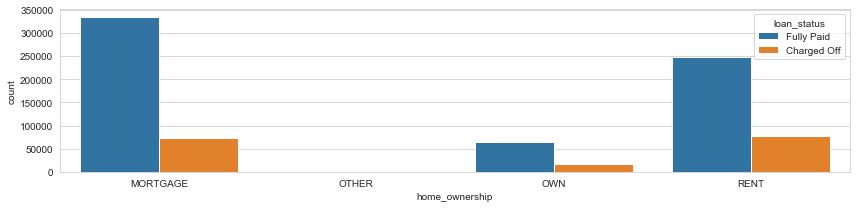

In [66]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

In [67]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.177808
OTHER       0.176056
OWN         0.215804
RENT        0.239422
Name: loan_status, dtype: float64

In [68]:
df['annual_inc'].describe()

count    8.149860e+05
mean     7.523039e+04
std      6.524373e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.550000e+06
Name: annual_inc, dtype: float64

In [69]:
df['annual_inc'] = df['annual_inc'].apply(lambda x:np.log10(x+1))

In [70]:
df['annual_inc'].describe()

count    814986.000000
mean          4.810836
std           0.231893
min           0.000000
25%           4.653222
50%           4.812920
75%           4.954247
max           6.980003
Name: annual_inc, dtype: float64

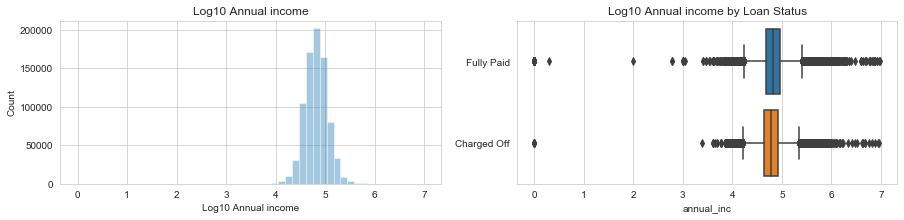

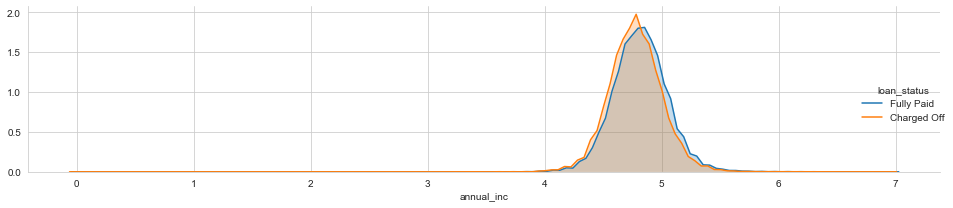

In [71]:
plot_var('annual_inc', 'Log10 Annual income', continuous=True)

In [72]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,4.777072,0.227015,0.0,4.632467,4.778158,4.915096,6.949393
Fully Paid,646902.0,4.819608,0.232342,0.0,4.672107,4.812920,4.963793,6.980003


In [73]:
df['verification_status'].value_counts()

Source Verified    293897
Verified           269895
Not Verified       251194
Name: verification_status, dtype: int64

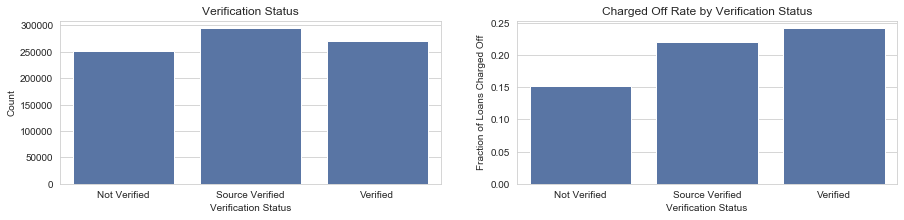

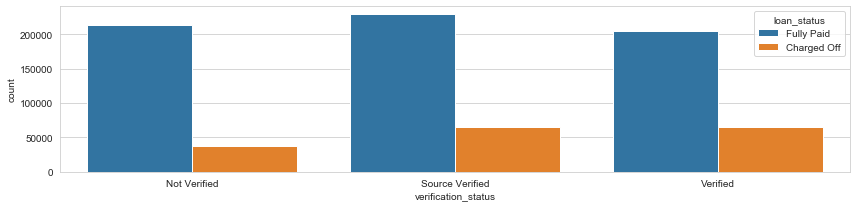

In [74]:
plot_var('verification_status', 'Verification Status', continuous=False)

In [75]:
df['purpose'].value_counts()

debt_consolidation    481652
credit_card           175123
home_improvement       50793
other                  43900
major_purchase         17463
small_business         10214
car                     8936
medical                 8772
moving                  5725
vacation                5116
house                   4095
wedding                 2272
renewable_energy         599
educational              326
Name: purpose, dtype: int64

In [76]:
df.groupby('purpose')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)


purpose
small_business        0.302428
renewable_energy      0.247078
moving                0.242969
medical               0.229366
debt_consolidation    0.217398
other                 0.216970
house                 0.214652
vacation              0.198788
major_purchase        0.183245
home_improvement      0.181383
credit_card           0.178412
educational           0.171779
car                   0.148053
wedding               0.121919
Name: loan_status, dtype: float64

In [77]:
df['title'].describe()


count                 807068
unique                 60298
top       Debt consolidation
freq                  371874
Name: title, dtype: object

In [78]:
df['title'].value_counts().head(10)


Debt consolidation         371874
Credit card refinancing    133334
Home improvement            39171
Other                       33265
Debt Consolidation          15059
Major purchase              12311
Medical expenses             6908
Business                     6666
Car financing                5667
Consolidation                5090
Name: title, dtype: int64

In [79]:
drop_cols('title')

In [80]:
df['zip_code'].describe()

count     814986
unique       925
top        945xx
freq        9517
Name: zip_code, dtype: object

In [81]:
df['addr_state'].describe()

count     814986
unique        51
top           CA
freq      124204
Name: addr_state, dtype: object

In [82]:
drop_cols('zip_code')

In [83]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True)[:,'Charged Off'].sort_values(ascending=False)

addr_state
MS    0.275619
NE    0.267946
OK    0.248252
AL    0.247650
AR    0.243154
LA    0.237900
ND    0.237232
NV    0.234202
TN    0.230479
IN    0.228179
NY    0.227045
SD    0.225787
NM    0.225694
OH    0.225400
FL    0.222007
MO    0.219400
KY    0.216353
NJ    0.216208
NC    0.215282
MD    0.214845
PA    0.214776
MN    0.210363
MI    0.208880
VA    0.207942
DE    0.206575
HI    0.204535
AK    0.204141
TX    0.202286
AZ    0.199321
CA    0.198303
RI    0.194009
ID    0.193487
IL    0.193302
MA    0.192974
GA    0.191224
CT    0.183810
WV    0.182457
UT    0.179049
WY    0.178142
MT    0.177759
WI    0.175315
SC    0.172705
KS    0.171004
WA    0.166538
CO    0.158083
OR    0.152827
VT    0.149225
IA    0.142857
NH    0.142554
ME    0.136564
DC    0.130378
Name: loan_status, dtype: float64

In [84]:
df['dti'].describe()

count    814950.000000
mean         17.867719
std           8.856477
min          -1.000000
25%          11.640000
50%          17.360000
75%          23.630000
max         999.000000
Name: dti, dtype: float64

Text(0.5, 1.0, 'DTI by loan status')

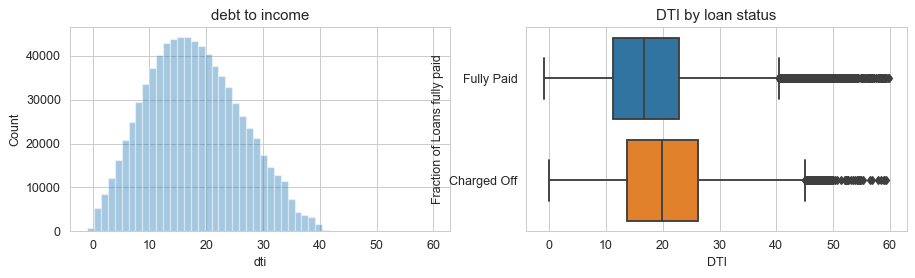

In [85]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
sns.distplot(df.loc[df['dti'].notnull() & (df['dti'] < 60), 'dti'], kde=False, ax=ax1)
ax1.set_xlabel('dti')
ax1.set_ylabel('Count')
ax1.set_title('debt to income')
sns.boxplot(x=df.loc[df['dti'].notnull() & (df['dti'] < 60), 'dti'], y='loan_status', data=df, ax=ax2)
ax2.set_xlabel('DTI')
ax2.set_ylabel('Fraction of Loans fully paid')
ax2.set_title('Fully paid rate by debt to income')
ax2.set_title('DTI by loan status')

In [86]:
(df['dti'] > 40).sum() / (df['dti']).sum()

0.0001017766442811112

In [87]:
(df['dti'] > 40).sum()

1482

In [88]:
df.groupby('loan_status')['dti'].median()

loan_status
Charged Off    19.77
Fully Paid     16.77
Name: dti, dtype: float64

In [89]:
df['open_acc'].describe()


count    814986.000000
mean         11.521099
std           5.325064
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

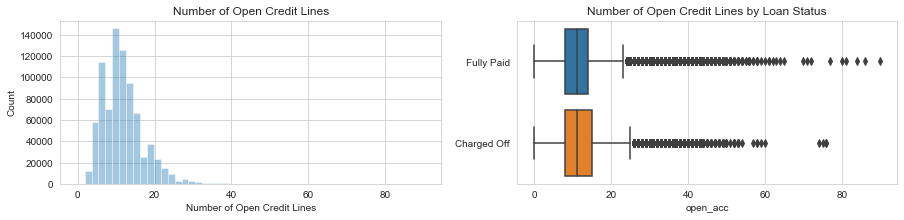

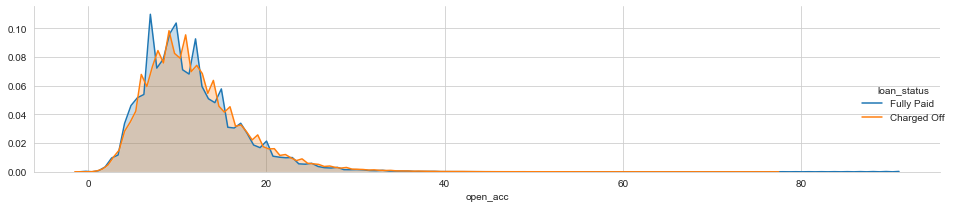

In [90]:
plot_var('open_acc', 'Number of Open Credit Lines', continuous=True)

In [91]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,11.883094,5.515590,0.0,8.0,11.0,15.0,76.0
Fully Paid,646902.0,11.427041,5.270369,0.0,8.0,11.0,14.0,90.0


In [92]:
df['earliest_cr_line'].sample(5)

1631800    Feb-1995
391631     Nov-1999
3425       Apr-1999
605304     Nov-2001
1288196    Sep-2008
Name: earliest_cr_line, dtype: object

In [93]:
df['earliest_cr_line'].describe()

count       814986
unique         712
top       Aug-2001
freq          6024
Name: earliest_cr_line, dtype: object

In [94]:
df['earliest_cr_line'].isnull().any()

False

In [95]:
from datetime import datetime

df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

dttoday = datetime.now().strftime('%Y-%m-%d')
df.earliest_cr_line = df.earliest_cr_line.apply(lambda x:(np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)

df.earliest_cr_line.shape

(814986,)

In [96]:
df.earliest_cr_line.sample(5)

821634     24.761644
868914     24.093151
1393786    33.019178
309103     22.093151
88834      16.087671
Name: earliest_cr_line, dtype: float64

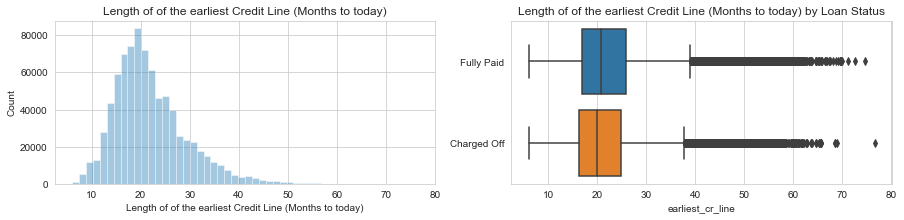

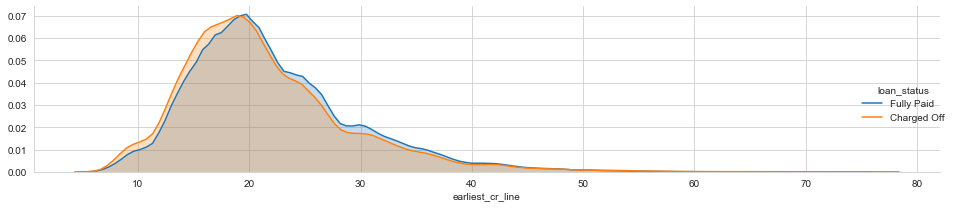

In [97]:
plot_var('earliest_cr_line', 'Length of of the earliest Credit Line (Months to today)', continuous=True)

In [98]:
df.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,21.244484,7.399904,6.167123,16.172603,19.838356,24.843836,76.545205
Fully Paid,646902.0,22.017798,7.382157,6.000000,16.923288,20.673973,25.761644,74.542466


In [99]:
df[['fico_range_low','fico_range_high']].describe()

,fico_range_low,fico_range_high
count,814986.000000,814986.000000
mean,695.603151,699.603264
std,31.352251,31.352791
min,625.000000,629.000000
25%,670.000000,674.000000
50%,690.000000,694.000000
75%,710.000000,714.000000
max,845.000000,850.000000


In [100]:
df[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [101]:
df['fico_score'] = (df['fico_range_low'] + df['fico_range_high'])/2.

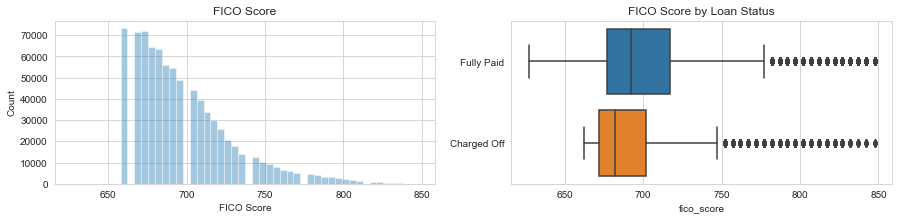

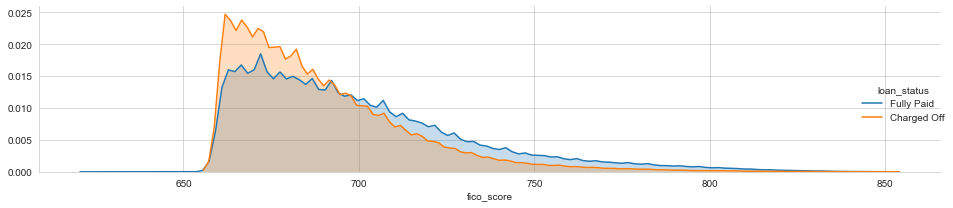

In [102]:
plot_var('fico_score', 'FICO Score', continuous=True)

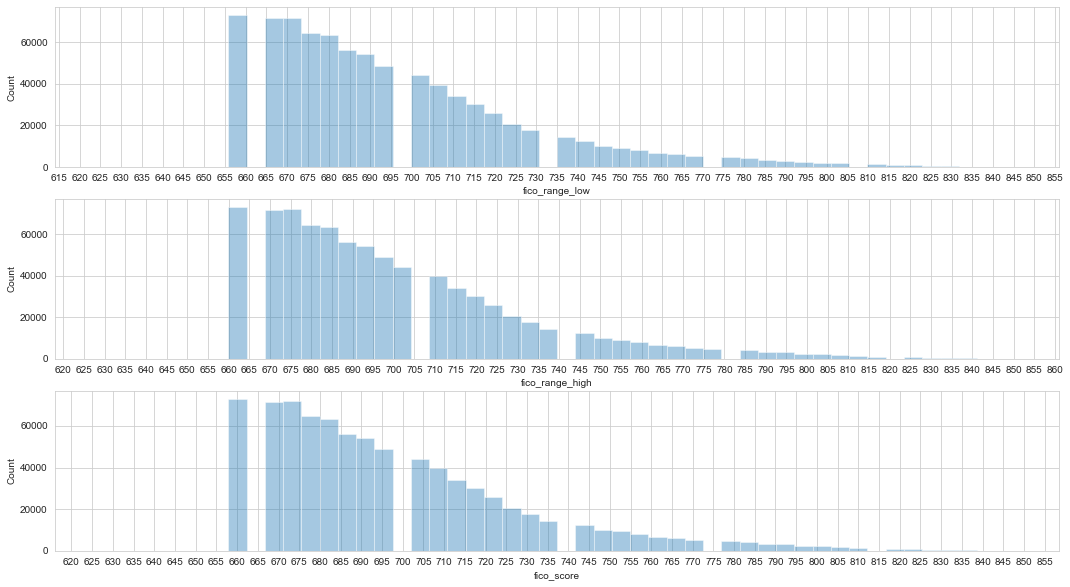

In [103]:
import matplotlib.ticker as ticker

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(18,10))
sns.distplot(df.loc[df['fico_range_low'].notnull(), 'fico_range_low'], kde=False, ax=ax1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.set_ylabel('Count')

sns.distplot(df.loc[df['fico_range_high'].notnull(), 'fico_range_high'], kde=False, ax=ax2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.set_ylabel('Count')

sns.distplot(df.loc[df['fico_score'].notnull(), 'fico_score'], kde=False, ax=ax3)
ax3.set_ylabel('Count')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [104]:
df['fico_range_low'].value_counts().sort_index().head(5)

625.0        1
630.0        1
660.0    73195
665.0    71431
670.0    71886
Name: fico_range_low, dtype: int64

In [105]:
df['fico_range_high'].value_counts().sort_index().head(5)

629.0        1
634.0        1
664.0    73195
669.0    71431
674.0    71886
Name: fico_range_high, dtype: int64

In [106]:
df['fico_score'].value_counts().sort_index().head(5)

627.0        1
632.0        1
662.0    73195
667.0    71431
672.0    71886
Name: fico_score, dtype: int64

In [107]:
df[['fico_score','open_acc','earliest_cr_line','dti']].corr()

,fico_score,open_acc,earliest_cr_line,dti
fico_score,1.000000,0.009944,0.114372,-0.093522
open_acc,0.009944,1.000000,0.121138,0.279120
earliest_cr_line,0.114372,0.121138,1.000000,0.016526
dti,-0.093522,0.279120,0.016526,1.000000


In [108]:
plot_df = df.query('fico_score > 650')[:3000]

Text(0.5, 0, 'fico_score')

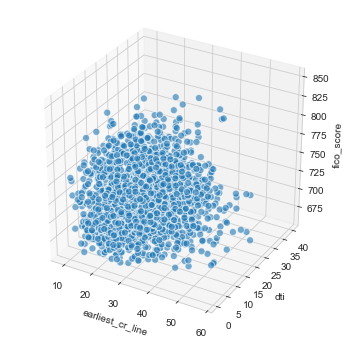

In [109]:
%matplotlib inline
# Visualizing 3-D numeric data with Scatter Plots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13, 6))
#fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax1 = fig.add_subplot(121, projection='3d')

xs = plot_df['earliest_cr_line']
ys = plot_df['dti']
zs = plot_df['fico_score']
ax1.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', cmap='greens')

ax1.set_xlabel('earliest_cr_line')
ax1.set_ylabel('dti')
ax1.set_zlabel('fico_score')

Text(0.5, 1.05, 'Fico_score - earliest_cr_line - DTI')

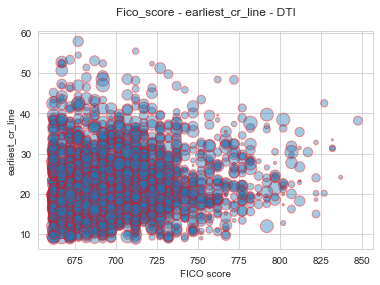

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
# Visualizing 3-D numeric data with a bubble chart
plt.scatter(zs, xs, s=ys*5, 
            alpha=0.4, edgecolors='red')

plt.xlabel('FICO score')
plt.ylabel('earliest_cr_line')
plt.title('Fico_score - earliest_cr_line - DTI',y=1.05)

In [111]:
df[['fico_score','int_rate','term']].corr()

,fico_score,int_rate,term
fico_score,1.000000,-0.425425,-0.005257
int_rate,-0.425425,1.000000,0.426839
term,-0.005257,0.426839,1.000000


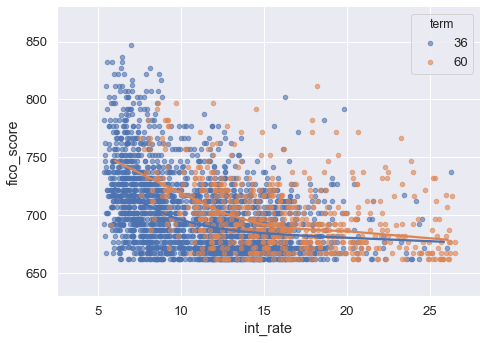

In [112]:
%matplotlib inline
plot_df = df.query('fico_score > 650 & int_rate <28')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 

g = sns.lmplot("int_rate", "fico_score", x_jitter= .7,  y_jitter= .1, data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False, scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(2.5, 28),ylim=(630, 880),alpha = .5)

#g.savefig('1.png',transparent=True)

In [113]:
drop_cols(['fico_range_high','fico_range_low'])

In [114]:
df['pub_rec'].describe()

count    814986.000000
mean          0.205734
std           0.584933
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [115]:
df['pub_rec'].value_counts().sort_values(ascending=False)

0.0     681509
1.0     112483
2.0      14115
3.0       4107
4.0       1400
5.0        651
6.0        338
7.0        146
8.0         90
9.0         42
10.0        28
11.0        24
12.0        15
13.0        11
15.0         5
18.0         3
16.0         2
19.0         2
14.0         2
49.0         2
28.0         2
86.0         1
34.0         1
24.0         1
46.0         1
54.0         1
63.0         1
17.0         1
21.0         1
40.0         1
Name: pub_rec, dtype: int64

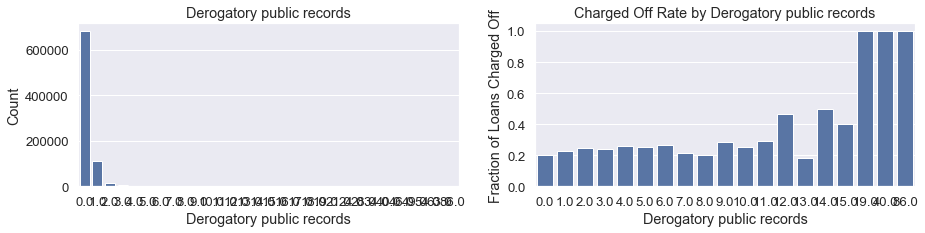

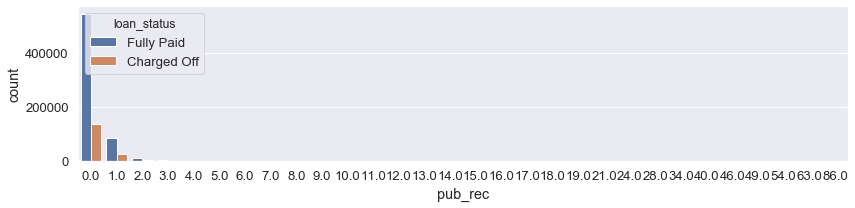

In [116]:
%matplotlib inline
plot_var('pub_rec','Derogatory public records', continuous=False)

In [117]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,0.232247,0.640855,0.0,0.0,0.0,0.0,86.0
Fully Paid,646902.0,0.198845,0.569304,0.0,0.0,0.0,0.0,63.0


In [118]:
df.pub_rec = df.pub_rec.map(lambda x: 3 if x >2.0 else x)

In [119]:
df['pub_rec'].value_counts().sort_values(ascending=False)

0.0    681509
1.0    112483
2.0     14115
3.0      6879
Name: pub_rec, dtype: int64

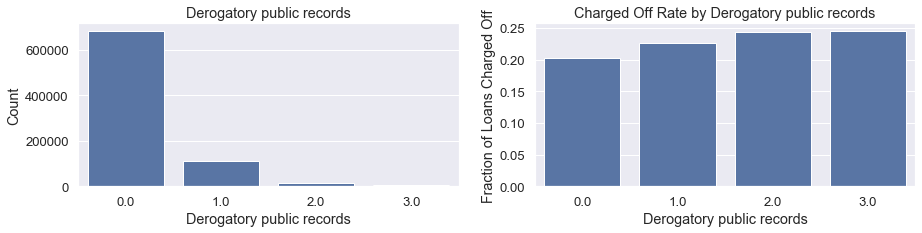

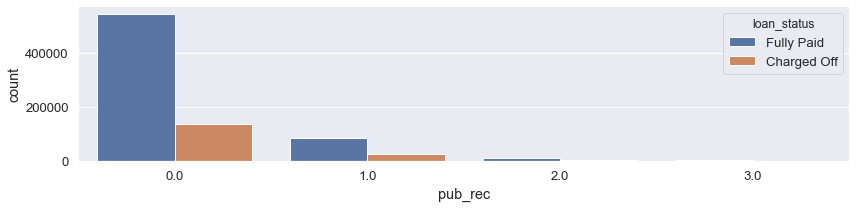

In [120]:
%matplotlib inline
plot_var('pub_rec','Derogatory public records', continuous=False)

In [121]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,168084.0,0.222591,0.523628,0.0,0.0,0.0,0.0,3.0
Fully Paid,646902.0,0.191584,0.485842,0.0,0.0,0.0,0.0,3.0


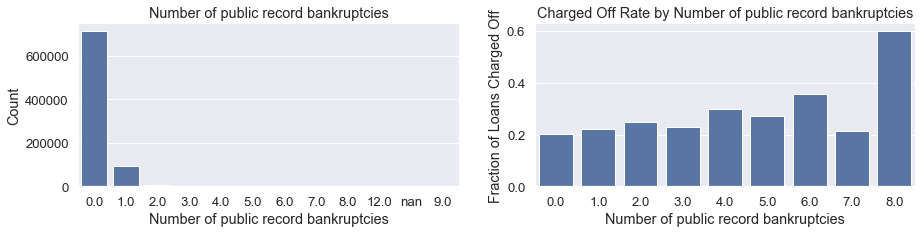

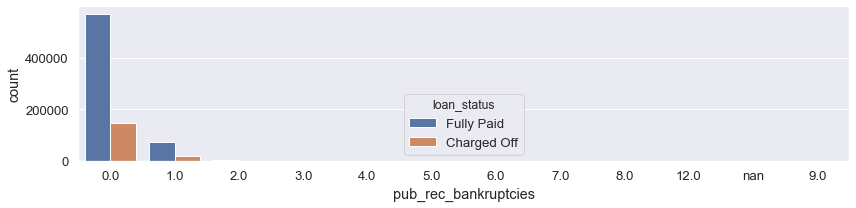

In [122]:
%matplotlib inline
plot_var('pub_rec_bankruptcies', 'Number of public record bankruptcies', continuous=False)

In [123]:
df[['pub_rec','pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.750146
pub_rec_bankruptcies,0.750146,1.000000


In [124]:
df['revol_bal'].describe()

count    8.149860e+05
mean     1.606864e+04
std      2.160500e+04
min      0.000000e+00
25%      6.014000e+03
50%      1.118500e+04
75%      1.972300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64

In [125]:
df['revol_bal'] = df['revol_bal'].apply(lambda x:np.log10(x+1))

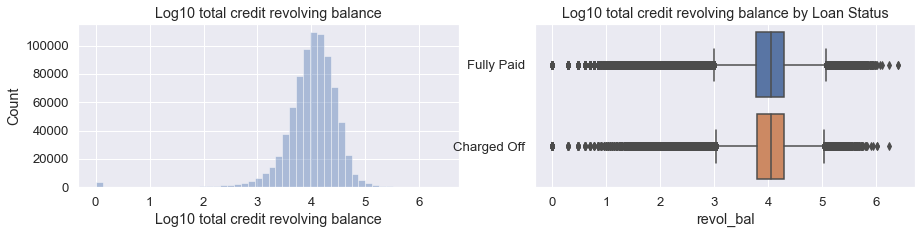

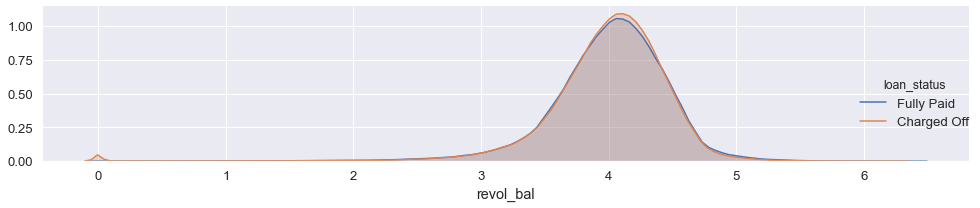

In [126]:
plot_var('revol_bal', 'Log10 total credit revolving balance', continuous=True)

In [127]:
df['revol_util'].describe()

count    814496.000000
mean         53.031137
std          24.320981
min           0.000000
25%          35.000000
50%          53.700000
75%          71.900000
max         892.300000
Name: revol_util, dtype: float64

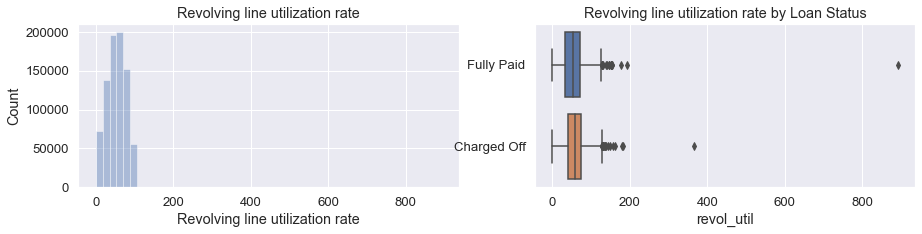

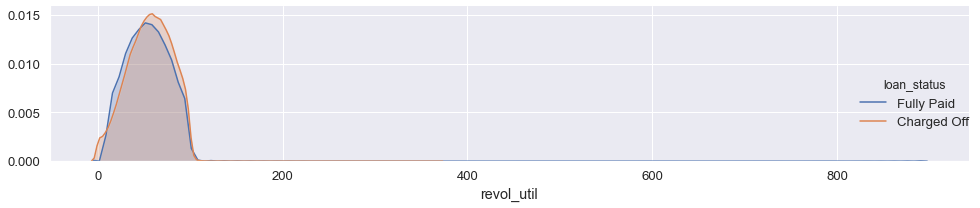

In [128]:
plot_var('revol_util', 'Revolving line utilization rate', continuous=True)

In [129]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,167974.0,56.475417,23.566253,0.0,39.5,57.5,74.7,366.6
Fully Paid,646522.0,52.136273,24.433954,0.0,33.9,52.7,71.0,892.3


In [130]:
df['total_acc'].describe()


count    814986.000000
mean         25.421359
std          11.970502
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         176.000000
Name: total_acc, dtype: float64

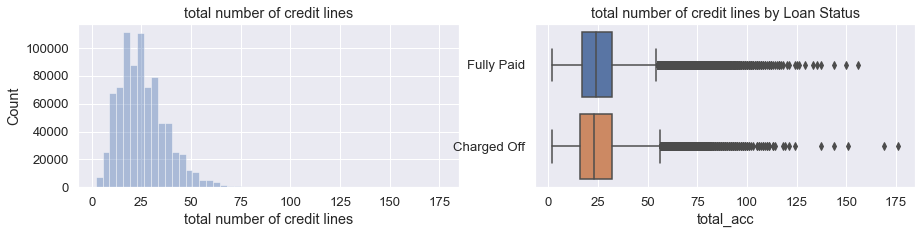

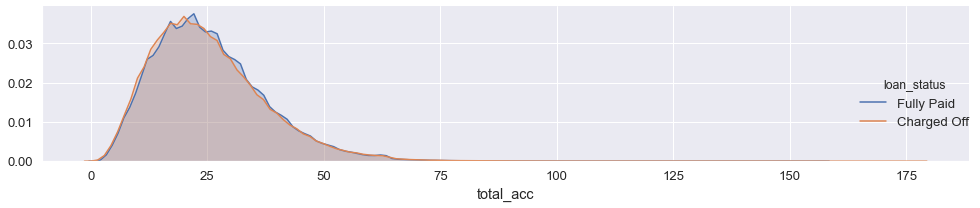

In [131]:
plot_var('total_acc', 'total number of credit lines', continuous=True)


In [132]:
df['initial_list_status'].value_counts()

f    413678
w    401308
Name: initial_list_status, dtype: int64

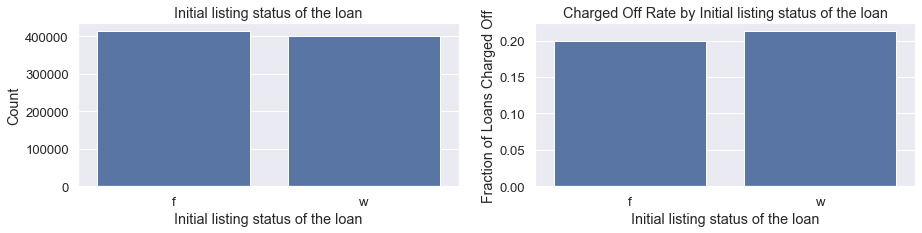

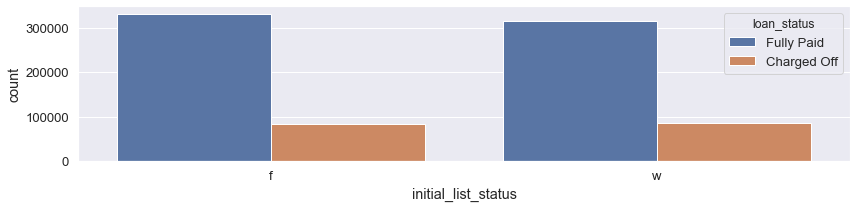

In [133]:
plot_var('initial_list_status','Initial listing status of the loan', continuous=False)

In [134]:
df['policy_code'].value_counts()

1.0    814986
Name: policy_code, dtype: int64

In [135]:
drop_cols('policy_code')

In [136]:
df['application_type'].value_counts()

Individual    811207
Joint App       3779
Name: application_type, dtype: int64

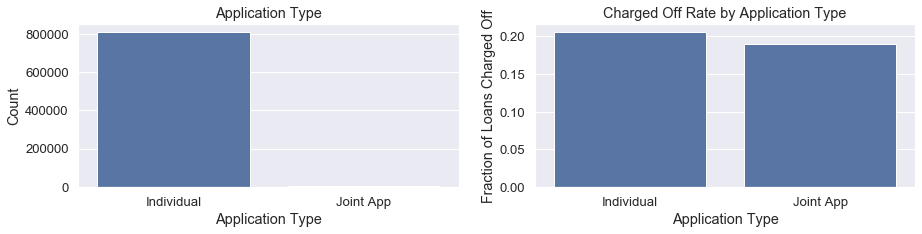

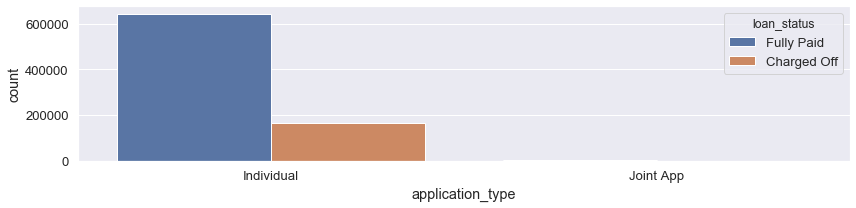

In [137]:
plot_var('application_type', 'Application Type', continuous=False)

In [138]:
df['mo_sin_old_il_acct'].describe()

count    725427.000000
mean        125.926232
std          51.554620
min           0.000000
25%          98.000000
50%         129.000000
75%         152.000000
max         724.000000
Name: mo_sin_old_il_acct, dtype: float64

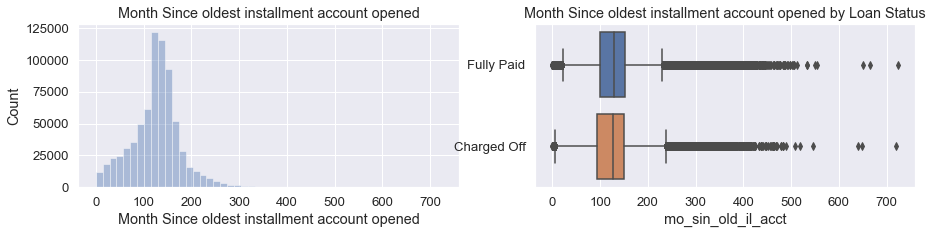

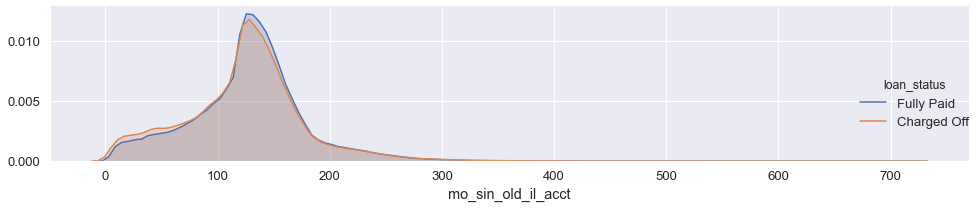

In [139]:
plot_var('mo_sin_old_il_acct', 'Month Since oldest installment account opened', continuous=True)

In [140]:
df['mo_sin_old_rev_tl_op'].describe()

count    747458.000000
mean        180.843182
std          92.192939
min           2.000000
25%         117.000000
50%         164.000000
75%         228.000000
max         842.000000
Name: mo_sin_old_rev_tl_op, dtype: float64

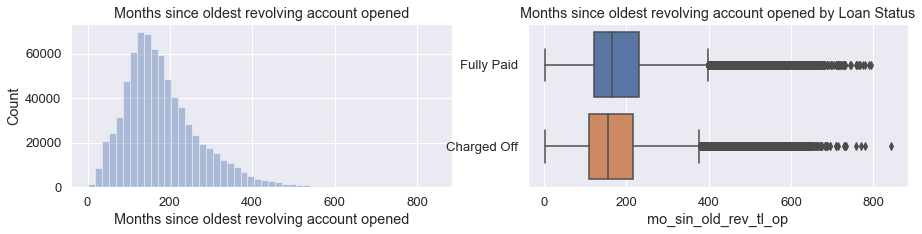

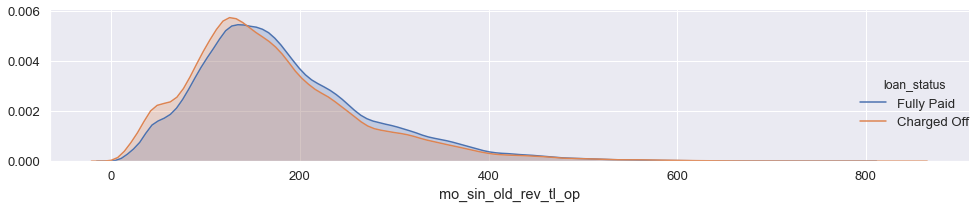

In [141]:
plot_var('mo_sin_old_rev_tl_op', 'Months since oldest revolving account opened', continuous=True)

In [142]:
df['mort_acc'].describe()

count    767705.000000
mean          1.758707
std           2.081730
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          51.000000
Name: mort_acc, dtype: float64

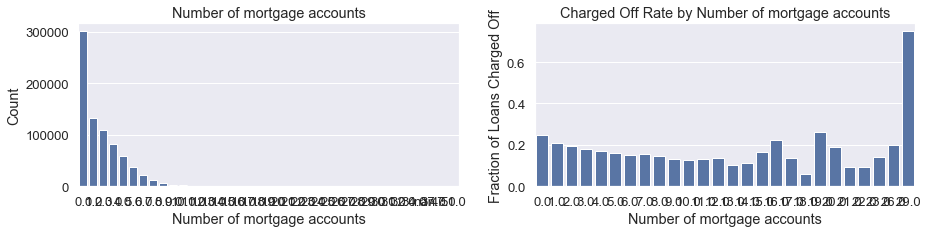

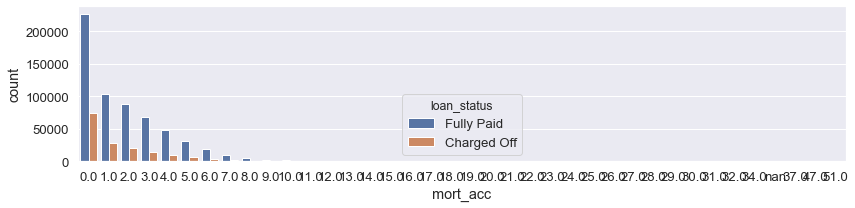

In [143]:
plot_var('mort_acc', 'Number of mortgage accounts', continuous=False)

In [144]:
df.mort_acc = df.mort_acc.map(lambda x: 6.0 if x > 6.0 else x)

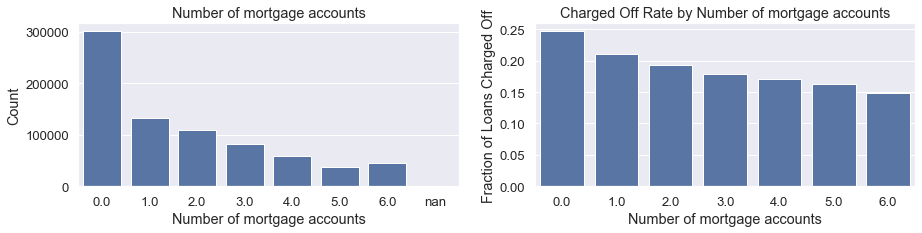

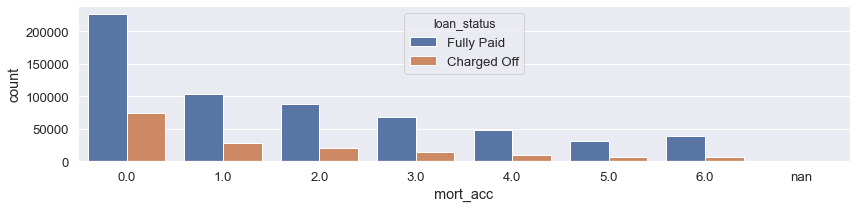

In [145]:
plot_var('mort_acc', 'Number of mortgage accounts', continuous=False)

In [146]:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,161198.0,1.401177,1.737651,0.0,0.0,1.0,2.0,6.0
Fully Paid,606507.0,1.765027,1.881911,0.0,0.0,1.0,3.0,6.0


In [147]:
# Next, I will convert the "loan_status" column to a 0/1 "charged off" column. Fully Paid:0 Charged Off: 1
df['Charged_Off'] = df['loan_status'].apply(lambda s: np.float(s == 'Charged Off'))
drop_cols('loan_status')

In [148]:
list_float = df.select_dtypes(exclude=['object']).columns

In [149]:
def run_KS_test(feature):
    dist1 = df.loc[df.Charged_Off == 0,feature]
    dist2 = df.loc[df.Charged_Off == 1,feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')

In [150]:
from statsmodels.stats.proportion import proportions_ztest
def run_proportion_Z_test(feature):
    dist1 = df.loc[df.Charged_Off == 0, feature]
    dist2 = df.loc[df.Charged_Off == 1, feature]
    n1 = len(dist1)
    p1 = dist1.sum()
    n2 = len(dist2)
    p2 = dist2.sum()
    z_score, p_value = proportions_ztest([p1, p2], [n1, n2])
    print(feature+':')
    print('z-score = {}; p-value = {}'.format(z_score, p_value),'\n')

In [151]:
from scipy.stats import chi2_contingency
def run_chi2_test(df, feature):

    dist1 = df.loc[df.loan_status == 'Fully Paid',feature].value_counts().sort_index().tolist()
    dist2 = df.loc[df.loan_status == 'Charged Off',feature].value_counts().sort_index().tolist()
    chi2, p, dof, expctd = chi2_contingency([dist1,dist2])
    print(feature+':')
    print("chi-square test statistic:", chi2)
    print("p-value", p, '\n')

In [152]:
for i in list_float:
    run_KS_test(i)

loan_amnt:
Ks_2sampResult(statistic=0.07929615091065739, pvalue=0.0) 

term:
Ks_2sampResult(statistic=0.1878843211069673, pvalue=0.0) 

int_rate:
Ks_2sampResult(statistic=0.25494110149394783, pvalue=0.0) 

installment:
Ks_2sampResult(statistic=0.06536048843842956, pvalue=0.0) 

emp_length:
Ks_2sampResult(statistic=0.023675009354882204, pvalue=2.2208273629187616e-65) 

annual_inc:
Ks_2sampResult(statistic=0.0820131215319414, pvalue=0.0) 

dti:
Ks_2sampResult(statistic=0.13172341350693528, pvalue=0.0) 

earliest_cr_line:
Ks_2sampResult(statistic=0.05313445396103783, pvalue=0.0) 

open_acc:
Ks_2sampResult(statistic=0.03457677956795924, pvalue=5.6717399652287154e-139) 

pub_rec:
Ks_2sampResult(statistic=0.0230215607998836, pvalue=7.631710963272179e-62) 

revol_bal:
Ks_2sampResult(statistic=0.011420765232811325, pvalue=1.5333357736260159e-15) 

revol_util:
Ks_2sampResult(statistic=0.07482343533269276, pvalue=0.0) 

total_acc:
Ks_2sampResult(statistic=0.018250693539464735, pvalue=5.023292092

In [153]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 814986 entries, 0 to 1646792
Data columns (total 27 columns):
loan_amnt               814986 non-null float64
term                    814986 non-null int64
int_rate                814986 non-null float64
installment             814986 non-null float64
sub_grade               814986 non-null object
emp_length              772733 non-null float64
home_ownership          814986 non-null object
annual_inc              814986 non-null float64
verification_status     814986 non-null object
issue_d                 814986 non-null object
purpose                 814986 non-null object
addr_state              814986 non-null object
dti                     814950 non-null float64
earliest_cr_line        814986 non-null float64
open_acc                814986 non-null float64
pub_rec                 814986 non-null float64
revol_bal               814986 non-null float64
revol_util              814496 non-null float64
total_acc               814986 n

In [154]:
list_float = df.select_dtypes(exclude=['object']).columns
list_float

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mort_acc', 'pub_rec_bankruptcies',
       'fico_score', 'Charged_Off'],
      dtype='object')

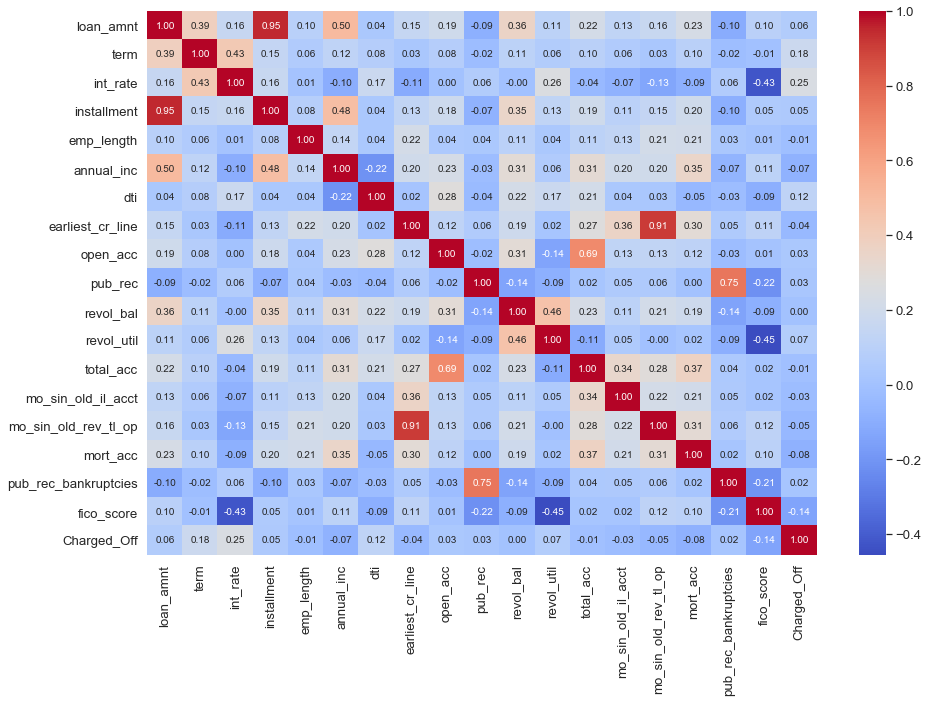

In [155]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df[list_float].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

In [156]:
cor = df[list_float].corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.1) | (cor < -0.1)]

term                  loan_amnt               0.386449
int_rate              loan_amnt               0.158214
                      term                    0.426839
installment           loan_amnt               0.953588
                      term                    0.145842
                      int_rate                0.160821
annual_inc            loan_amnt               0.504394
                      term                    0.122812
                      int_rate               -0.102222
                      installment             0.483259
                      emp_length              0.136435
dti                   int_rate                0.170415
                      annual_inc             -0.215161
earliest_cr_line      loan_amnt               0.148525
                      int_rate               -0.112131
                      installment             0.131444
                      emp_length              0.216412
                      annual_inc              0.202806
open_acc  

In [157]:
df[["installment","loan_amnt","mo_sin_old_rev_tl_op","earliest_cr_line","total_acc","open_acc", "pub_rec_bankruptcies", "pub_rec"]].isnull().any()

installment             False
loan_amnt               False
mo_sin_old_rev_tl_op     True
earliest_cr_line        False
total_acc               False
open_acc                False
pub_rec_bankruptcies     True
pub_rec                 False
dtype: bool

In [158]:
list_linear = ['installment', 'mo_sin_old_rev_tl_op','total_acc','pub_rec_bankruptcies']

In [159]:
linear_corr = pd.DataFrame()

In [160]:
# Pearson coefficients
for col in df[list_float].columns:
    linear_corr.loc[col, 'pearson_corr'] = df[col].corr(df['Charged_Off'])
linear_corr['abs_pearson_corr'] = abs(linear_corr['pearson_corr'])

In [161]:
linear_corr.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_corr.drop('abs_pearson_corr', axis=1, inplace=True)
linear_corr.drop('Charged_Off', axis=0, inplace=True)

In [162]:
linear_corr.reset_index(inplace=True)
#linear_corr.rename(columns={'index':'variable'}, inplace=True)
linear_corr

,index,pearson_corr
0,int_rate,0.247815
1,term,0.177708
2,fico_score,-0.139429
3,dti,0.123031
4,mort_acc,-0.079739
5,annual_inc,-0.074216
6,revol_util,0.072185
7,loan_amnt,0.064139
8,mo_sin_old_rev_tl_op,-0.048529
9,installment,0.046291


In [163]:
# Drop the linear correlated features
drop_cols(list_linear)

In [164]:
df.shape

(814986, 23)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814986 entries, 0 to 1646792
Data columns (total 23 columns):
loan_amnt              814986 non-null float64
term                   814986 non-null int64
int_rate               814986 non-null float64
sub_grade              814986 non-null object
emp_length             772733 non-null float64
home_ownership         814986 non-null object
annual_inc             814986 non-null float64
verification_status    814986 non-null object
issue_d                814986 non-null object
purpose                814986 non-null object
addr_state             814986 non-null object
dti                    814950 non-null float64
earliest_cr_line       814986 non-null float64
open_acc               814986 non-null float64
pub_rec                814986 non-null float64
revol_bal              814986 non-null float64
revol_util             814496 non-null float64
initial_list_status    814986 non-null object
application_type       814986 non-null object
mo_si

In [166]:
df.sample(5)

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,mo_sin_old_il_acct,mort_acc,fico_score,Charged_Off
1283611,19000.0,36,11.99,B5,10.0,MORTGAGE,4.865782,Not Verified,Jul-2017,debt_consolidation,NJ,16.76,26.263014,15.0,0.0,4.222742,24.6,w,Individual,155.0,1.0,697.0,0.0
193794,35000.0,60,16.59,D1,0.0,MORTGAGE,5.152291,Verified,Mar-2014,debt_consolidation,MO,22.93,28.764384,11.0,0.0,4.612922,89.0,f,Individual,149.0,5.0,717.0,0.0
870729,4000.0,36,11.55,B3,7.0,MORTGAGE,4.929424,Source Verified,Aug-2013,debt_consolidation,DC,11.73,15.005479,5.0,0.0,3.714078,46.2,w,Individual,62.0,2.0,747.0,1.0
1440663,18250.0,36,7.49,A4,0.0,RENT,5.041397,Not Verified,Dec-2016,credit_card,CA,17.32,21.758904,11.0,0.0,4.244178,53.8,f,Individual,159.0,0.0,737.0,0.0
1467913,30000.0,60,13.99,C3,10.0,MORTGAGE,4.838855,Source Verified,Nov-2016,debt_consolidation,CA,18.66,24.928767,9.0,1.0,4.284746,54.4,w,Joint App,171.0,2.0,707.0,0.0


In [167]:
missing_values_table(df)

Your selected dataframe has 23 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values,type
mo_sin_old_il_acct,89559,11.0,float64
mort_acc,47281,5.8,float64
emp_length,42253,5.2,float64
revol_util,490,0.1,float64
dti,36,0.0,float64


In [168]:
dummy_list =['sub_grade','home_ownership','verification_status','purpose','addr_state','initial_list_status','application_type']

In [169]:
df[dummy_list].isnull().any()

sub_grade              False
home_ownership         False
verification_status    False
purpose                False
addr_state             False
initial_list_status    False
application_type       False
dtype: bool

In [170]:
df = pd.get_dummies(df, columns=dummy_list, drop_first=True)

In [171]:
df.shape

(814986, 120)

In [172]:
df.head(1)

,loan_amnt,term,int_rate,emp_length,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,mo_sin_old_il_acct,mort_acc,fico_score,Charged_Off,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App
0,15000.0,60,12.39,10.0,4.8921,Dec-2014,12.03,25.928767,6.0,0.0,5.139907,29.0,103.0,0.0,752.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [173]:
df['issue_d'].sample()

622071    Mar-2015
Name: issue_d, dtype: object

In [174]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [175]:
df['issue_d'].sample()

856323   2013-09-01
Name: issue_d, dtype: datetime64[ns]

In [176]:
df['issue_d'].describe()

count                  814986
unique                    124
top       2014-10-01 00:00:00
freq                    33699
first     2007-06-01 00:00:00
last      2017-09-01 00:00:00
Name: issue_d, dtype: object

Text(0.5, 1.0, 'Loans funded per Year')

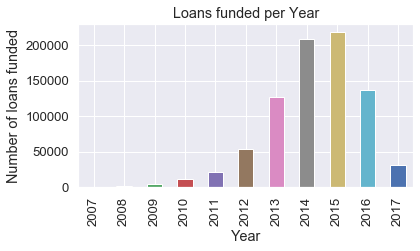

In [177]:
plt.figure(figsize=(6,3))
df['issue_d'].dt.year.value_counts().sort_index().plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of loans funded')
plt.title('Loans funded per Year')

In [178]:
df_train = df.loc[df['issue_d']  < df['issue_d'].quantile(0.8)]
df_test =  df.loc[df['issue_d'] >= df['issue_d'].quantile(0.8)]

In [179]:
print('Number of loans in the partition:   ', df_train.shape[0] + df_test.shape[0])
print('Number of loans in the full dataset:', df.shape[0])

Number of loans in the partition:    814986
Number of loans in the full dataset: 814986


In [180]:
df_train['issue_d'].describe()

count                  647071
unique                    103
top       2014-10-01 00:00:00
freq                    33699
first     2007-06-01 00:00:00
last      2015-12-01 00:00:00
Name: issue_d, dtype: object

In [181]:
df_test['issue_d'].describe()

count                  167915
unique                     21
top       2016-03-01 00:00:00
freq                    22914
first     2016-01-01 00:00:00
last      2017-09-01 00:00:00
Name: issue_d, dtype: object

In [182]:
df_train.drop('issue_d', axis=1, inplace=True)
df_test.drop('issue_d', axis=1, inplace=True)

In [183]:
X_train = df_train.drop(['Charged_Off'], axis=1)
y_train = df_train.loc[:, 'Charged_Off']

X_test = df_test.drop(['Charged_Off'], axis=1)
y_test = df_test['Charged_Off']

In [184]:
X_all = df.drop(['Charged_Off'], axis=1)
Y_all = df.loc[:, 'Charged_Off']

In [185]:
# Create an imputer object with a median filling strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Train on the training features
imputer.fit(X_train)

# Transform both training and testing data
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [186]:
missing_values_table(X_train)

Your selected dataframe has 118 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [187]:
missing_values_table(X_test)

Your selected dataframe has 118 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
# Create an imputer object with a median filling strategy
scaler = StandardScaler()

# Train on the training features
scaler.fit(X_train)

# Transform both training and testing data
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [191]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.394576,-0.611590
1,-1.595676,-2.654997
2,0.643042,1.156310
3,-0.554531,1.883248
4,0.168311,0.516427


In [192]:
y_train_df = pd.DataFrame(data=y_train.values, columns=['Charged_Off'])

In [193]:
finalDf = pd.concat([principalDf, y_train_df], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Charged_Off
0,0.394576,-0.611590,0.0
1,-1.595676,-2.654997,1.0
2,0.643042,1.156310,0.0
3,-0.554531,1.883248,1.0
4,0.168311,0.516427,0.0


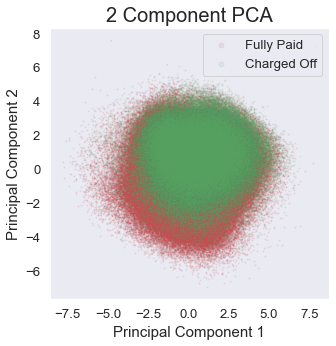

In [194]:
# visualize the PCA
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Charged_Off'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 1, alpha=0.1)
ax.legend(['Fully Paid', 'Charged Off'], markerscale=5.)
ax.grid()

In [195]:
pca.explained_variance_ratio_

array([0.02560507, 0.02453589])

In [196]:
linear_corr = pd.DataFrame()


In [197]:
# Pearson coefficients
for col in X_train.columns:
    linear_corr.loc[col, 'pearson_corr'] = X_train[col].corr(y_train)
linear_corr['abs_pearson_corr'] = abs(linear_corr['pearson_corr'])

In [198]:
linear_corr.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_corr.drop('abs_pearson_corr', axis=1, inplace=True)

In [199]:
linear_corr.reset_index(inplace=True)
#linear_corr.rename(columns={'index':'variable'}, inplace=True)

In [200]:
linear_corr.head(10)


,index,pearson_corr
0,verification_status_Verified,0.010210
1,revol_bal,0.009671
2,revol_util,0.008250
3,purpose_debt_consolidation,0.007217
4,initial_list_status_w,-0.006592
5,dti,0.006510
6,loan_amnt,0.006261
7,int_rate,0.006168
8,addr_state_NV,0.004709
9,fico_score,-0.004639


In [201]:
linear_corr.tail(10)


,index,pearson_corr
108,addr_state_DE,-0.000282
109,addr_state_SC,0.000264
110,addr_state_RI,-0.000147
111,addr_state_MO,0.000137
112,addr_state_CA,0.000117
113,sub_grade_G1,0.000106
114,addr_state_OH,0.000071
115,sub_grade_D5,0.000049
116,addr_state_LA,-0.000012
117,addr_state_SD,-0.000009


In [202]:
# CV model with Kfold stratified cross val
kfold = 3
random_state = 42

In [203]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [204]:
pipeline_sgdlr = Pipeline([
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=random_state, warm_start=False))
])

In [205]:
param_grid_sgdlr  = {
    'model__alpha': [10**-5, 10**-1, 10**2],
    'model__penalty': ['l1', 'l2']
}

In [206]:
grid_sgdlr = GridSearchCV(estimator=pipeline_sgdlr, param_grid=param_grid_sgdlr, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=kfold, verbose=1, return_train_score=False)

In [207]:
grid_sgdlr.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
                                                      loss='log', max_iter=1000,
                                                      n_iter_no_change=5,
                                                      n_jobs=None, penalty='l2',
                                                 

In [208]:
sgdlr_estimator = grid_sgdlr.best_estimator_
print('Best score: ', grid_sgdlr.best_score_)
print('Best parameters set: \n', grid_sgdlr.best_params_)

Best score:  0.703608567929287
Best parameters set: 
 {'model__alpha': 0.1, 'model__penalty': 'l2'}


In [209]:
y_pred_sgdlr = sgdlr_estimator.predict(X_test)
y_prob_sgdlr = sgdlr_estimator.predict_proba(X_test)[:,1]

In [210]:
y_train_pred_sgdlr = sgdlr_estimator.predict(X_train)
y_train_prob_sgdlr = sgdlr_estimator.predict_proba(X_train)[:,1]

In [211]:
LRmodel_l2 = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=random_state, warm_start=False, alpha=0.1, penalty='l2')

In [212]:
LRmodel_l2.fit(X_train, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [213]:
temp = sorted(zip(np.round(LRmodel_l2.coef_.reshape(-1),3), X_train.columns.values), key=lambda x: -abs(x[0]))
weight = [x for x, _ in temp]
feature = [x for _, x in temp]

In [214]:
print("Logistic Regression (L2) Coefficients: Top 10")
pd.DataFrame({'weight': weight}, index = feature).head(10)

Logistic Regression (L2) Coefficients: Top 10


,weight
term,0.181
int_rate,0.156
dti,0.125
fico_score,-0.114
annual_inc,-0.092
mort_acc,-0.066
home_ownership_RENT,0.063
loan_amnt,0.061
sub_grade_A4,-0.054
sub_grade_A2,-0.052


In [215]:
from sklearn.feature_selection import RFE
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1) # If None, half of the features are selected.
rfe_l2.fit(X_train, y_train)

RFE(estimator=SGDClassifier(alpha=0.1, average=False, class_weight=None,
                            early_stopping=False, epsilon=0.1, eta0=0.0,
                            fit_intercept=True, l1_ratio=0.15,
                            learning_rate='optimal', loss='log', max_iter=1000,
                            n_iter_no_change=5, n_jobs=None, penalty='l2',
                            power_t=0.5, random_state=42, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [216]:
temp = sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), X_train.columns))
rank = [x for x, _ in temp]
feature = [x for _, x in temp]
print("Logistic Regression (L2) RFE Result: Top 10")
pd.DataFrame({'rank': rank}, index = feature).head(10)

Logistic Regression (L2) RFE Result: Top 10


,rank
int_rate,1
term,2
dti,3
fico_score,4
mort_acc,5
annual_inc,6
loan_amnt,7
home_ownership_RENT,8
sub_grade_A4,9
sub_grade_A3,10


In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=random_state,max_features='sqrt') 
param_grid_rf = {
    #'n_estimators': [50, 100], 
    'class_weight': [{0:1, 1:1}], #'model__class_weight': [{0:1, 1:1}, {0:1,1:2}, {0:1, 1:3}, {0:1, 1:4}]
    #'model__min_samples_split':[2,3]
    #'model__max_features':[2,3,4,5],
    #"model__max_depth":range(8,13)
}

In [219]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='roc_auc',n_jobs=-1,pre_dispatch='2*n_jobs', cv=kfold, verbose=1, return_train_score=False)

In [220]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [221]:
rf_estimator = grid_rf.best_estimator_
print('Best score: ', grid_rf.best_score_)
print('Best parameters set: \n', grid_rf.best_params_)

Best score:  0.6587682992701517
Best parameters set: 
 {'class_weight': {0: 1, 1: 1}}


In [222]:
y_pred_rf = rf_estimator.predict(X_test)
y_prob_rf = rf_estimator.predict_proba(X_test)[:,1]

In [223]:
y_train_pred_rf = rf_estimator.predict(X_train)
y_train_prob_rf = rf_estimator.predict_proba(X_train)[:,1]

In [224]:
names = list(X_train)

In [225]:
feature_importances = pd.DataFrame(grid_rf.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                  ascending=False)

In [226]:
print("Features sorted by their score: Top 10")
feature_importances.head(10)

Features sorted by their score: Top 10


,importance
dti,0.075722
int_rate,0.072573
revol_bal,0.068150
revol_util,0.067069
earliest_cr_line,0.066640
annual_inc,0.065099
mo_sin_old_il_acct,0.062485
loan_amnt,0.059981
open_acc,0.050188
fico_score,0.047617


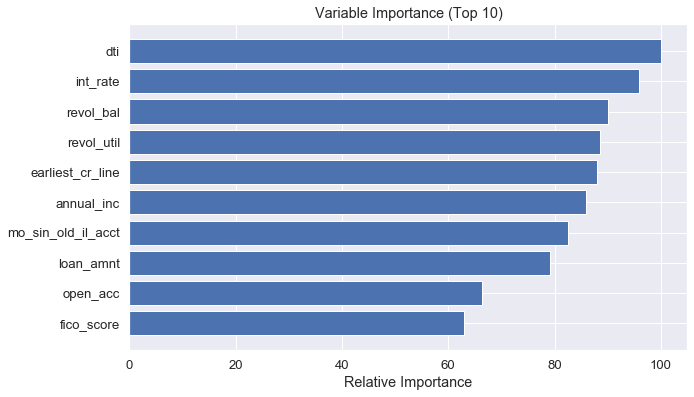

In [227]:
# Normalize The Features and visulize the top 10 features
%matplotlib inline
feature_importance = 100.0 * (grid_rf.best_estimator_.feature_importances_ / grid_rf.best_estimator_.feature_importances_.max())
sorted_idx = sorted(range(len(feature_importance)), key=lambda i: feature_importance[i])[-10:]
pos = np.arange(len(sorted_idx)) + .5
plt.figure(figsize=(10, 6))

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.asanyarray(X_train.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance (Top 10)')
plt.show()

In [228]:
print("Features sorted by their score: Bottom 10")
feature_importances.tail(10)

Features sorted by their score: Bottom 10


,importance
purpose_renewable_energy,0.000231
sub_grade_G4,0.000199
sub_grade_G5,0.000169
addr_state_ND,0.000131
purpose_educational,0.000123
application_type_Joint App,0.000111
home_ownership_OTHER,0.000105
addr_state_ME,0.000084
addr_state_ID,0.000004
addr_state_IA,0.000003


In [229]:
grid_rf.best_estimator_[1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1273642419, splitter='best')

In [230]:
!pip install pydot

In [231]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
rf_big = RandomForestClassifier(n_jobs=-1, random_state=random_state, n_estimators=10, max_depth=6) 
rf_big.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [232]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_jobs=-1, random_state=random_state, n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn import decomposition

In [234]:
#chaining a PCA and a knn
pipeline_knn = Pipeline([
    ('pca', decomposition.PCA()),
    ('model', KNeighborsClassifier(n_jobs=-1))   
])

pipeline_knn2 = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))   
])

In [235]:
param_grid_knn = {
    'pca__n_components': range(3,6),
    'model__n_neighbors': [5, 25, 125]
}
param_grid_knn2 = {
    'lda__n_components': range(3,6),
    'model__n_neighbors': [5, 25, 125]
}

In [236]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=kfold, verbose=1, return_train_score=False)
grid_knn2 = GridSearchCV(estimator=pipeline_knn2, param_grid=param_grid_knn2, scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=kfold, verbose=1, return_train_score=False)

In [237]:
%%time
#grid_knn.fit(X_train, y_train) # very slow

Wall time: 0 ns


In [238]:
%%time
grid_knn2.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  4.2min finished


Wall time: 4min 32s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lda',
                                        LinearDiscriminantAnalysis(n_components=None,
                                                                   priors=None,
                                                                   shrinkage=None,
                                                                   solver='svd',
                                                                   store_covariance=False,
                                                                   tol=0.0001)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
     

In [239]:
knn_estimator2 = grid_knn2.best_estimator_
print('Best score: ', grid_knn2.best_score_)
print('Best parameters set: \n', grid_knn2.best_params_)

Best score:  0.6955012632654656
Best parameters set: 
 {'lda__n_components': 3, 'model__n_neighbors': 125}


In [240]:
y_pred_knn = knn_estimator2.predict(X_test)
y_prob_knn = knn_estimator2.predict_proba(X_test)[:,1]

In [241]:
y_train_pred_knn = knn_estimator2.predict(X_train)
y_train_prob_knn = knn_estimator2.predict_proba(X_train)[:,1]

,AUROC,Algorithm
0,0.703609,SGD Logistic Regression
1,0.658768,RandomForest
2,0.695501,KNeighboors


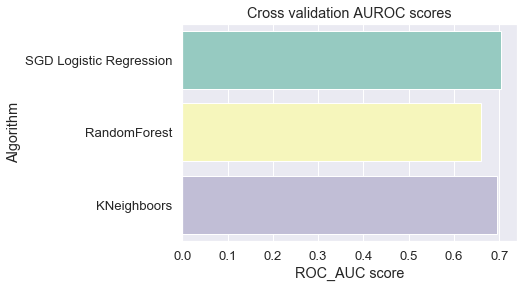

In [242]:
# plot the AUROC scores on the training dataset. 
auroc_means = [grid_sgdlr.best_score_, grid_rf.best_score_,grid_knn2.best_score_]
auroc_res = pd.DataFrame({"AUROC":auroc_means,"Algorithm":["SGD Logistic Regression",
"RandomForest","KNeighboors"]})

g = sns.barplot("AUROC","Algorithm", data = auroc_res, palette="Set3",orient = "h")
g.set_xlabel("ROC_AUC score")
g = g.set_title("Cross validation AUROC scores")
auroc_res

In [243]:
def evaluation(X_train, X_test, Y_train, Y_test, Y_train_pred, Y_train_prob, Y_pred, Y_prob):
    print("--- ROC AUC ---")
    print("Training Set:", roc_auc_score(Y_train, Y_train_prob))
    print("Test Set:", roc_auc_score(Y_test, Y_prob))
    
    print("\n--- Accuracy ---")
    print("Training Set:", accuracy_score(Y_train, Y_train_pred))
    print("Test Set:", accuracy_score(Y_test, Y_pred))

    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    print("\n--- Confusion Matrix ---")
    print("True Positive:", tp)
    print("False Negative:", fn)
    print("True Negative:", tn)
    print("False Positive:", fp)

    print("\n--- Precision ---")
    print("Training Set:", precision_score(Y_train, Y_train_pred))
    print("Test Set:", precision_score(Y_test, Y_pred))

    print("\n--- Recall ---")
    print("Training Set:", recall_score(Y_train, Y_train_pred))
    print("Test Set:", recall_score(Y_test, Y_pred))

    print("\n--- F1 Score ---")
    print("Training Set:", f1_score(Y_train, Y_train_pred))
    print("Test Set:", f1_score(Y_test, Y_pred))
      
def plot_ROC(X_test, Y_test, Y_prob):
    
    #Y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = roc_curve(Y_test, Y_prob, pos_label=1)
    roc_auc = roc_auc_score(Y_test, Y_prob)
    # These are the points at threshold = 0.1~0.5
    x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
    x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

    fig = plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2)
    plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
    plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Area = {:.2f})'.format(roc_auc))
    plt.legend(loc="lower right")
    plt.show()

===== Logistic Regression =====
--- ROC AUC ---
Training Set: 0.7137630660464039
Test Set: 0.6986531748959774

--- Accuracy ---
Training Set: 0.7993156856048255
Test Set: 0.7793705148438198

--- Confusion Matrix ---
True Positive: 1627
False Negative: 35570
True Negative: 129241
False Positive: 1477

--- Precision ---
Training Set: 0.6361713379164463
Test Set: 0.5241623711340206

--- Recall ---
Training Set: 0.01838226867450549
Test Set: 0.043740086566120925

--- F1 Score ---
Training Set: 0.03573205414757665
Test Set: 0.08074241333961937


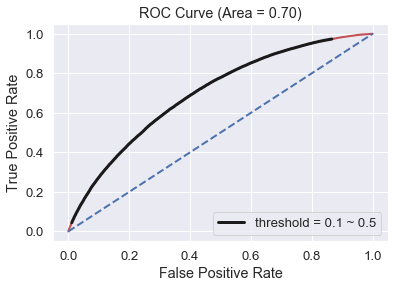

In [244]:
print('===== Logistic Regression =====')
evaluation(X_train, X_test, y_train, y_test, y_train_pred_sgdlr, y_train_prob_sgdlr, y_pred_sgdlr, y_prob_sgdlr)
plot_ROC(X_test, y_test, y_prob_sgdlr)

===== KNN =====
--- ROC AUC ---
Training Set: 0.7259935585320744
Test Set: 0.6943610459406439

--- Accuracy ---
Training Set: 0.8014669178498186
Test Set: 0.7820504421880118

--- Confusion Matrix ---
True Positive: 1942
False Negative: 35255
True Negative: 129376
False Positive: 1342

--- Precision ---
Training Set: 0.5544808349829045
Test Set: 0.5913520097442144

--- Recall ---
Training Set: 0.09416519593236915
Test Set: 0.05220851143909455

--- F1 Score ---
Training Set: 0.160990105476276
Test Set: 0.09594624638719398


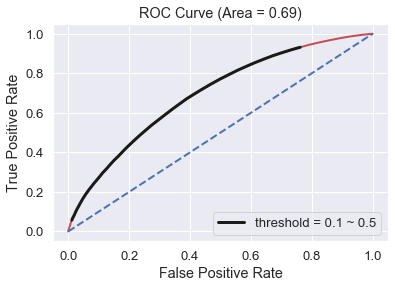

In [245]:
print('===== KNN =====')
evaluation(X_train, X_test, y_train, y_test, y_train_pred_knn, y_train_prob_knn, y_pred_knn, y_prob_knn)
plot_ROC(X_test, y_test, y_prob_knn)

===== Random Forest =====
--- ROC AUC ---
Training Set: 1.0
Test Set: 0.6927022770326954

--- Accuracy ---
Training Set: 0.9999845457453664
Test Set: 0.7795134443021767

--- Confusion Matrix ---
True Positive: 3723
False Negative: 33474
True Negative: 127169
False Positive: 3549

--- Precision ---
Training Set: 1.0
Test Set: 0.511963696369637

--- Recall ---
Training Set: 0.9999235982183104
Test Set: 0.10008871683200259

--- F1 Score ---
Training Set: 0.9999617976497914
Test Set: 0.167442488025366


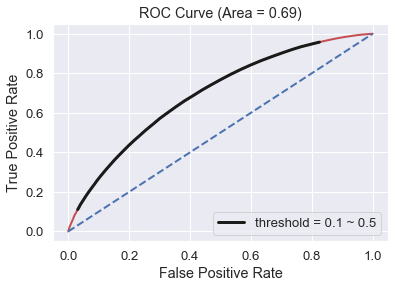

In [246]:
print('===== Random Forest =====')
evaluation(X_train, X_test, y_train, y_test, y_train_pred_rf, y_train_prob_rf, y_pred_rf, y_prob_rf)
plot_ROC(X_test, y_test, y_prob_rf)

In [247]:
# bank
score_bank = sum(y_test == 0) - sum(y_test == 1)

# my Logistic regression model
tn, fp, fn, tp = confusion_matrix(y_test, grid_sgdlr.predict(X_test)).ravel()
score_lr = tn - fn

print("The bank scores {} points".format(score_bank))
print("The Logistic regression model scores {} points".format(score_lr))

The bank scores 93521 points
The Logistic regression model scores 93671 points
